<a href="https://colab.research.google.com/github/NatchaponJ/NatchaponPortfolio.github.io/blob/main/pm25_Analysis_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# วิเคราะห์ข้อมูลเบื้องต้นโดยใช้ Python, Pandas และอื่นๆ


## Data and Input
ข้อมูลปริมาณฝุ่น Bangkok PM2.5 Data จาก Berkeley Earth โดยอยู่ในรูปแบบ csv file มีรายละเอียดของแต่ละฟิลด์ดังนี้
* Year
* Month
* Day
* UTC Hour
* PM2.5
* PM10_mask
* Retrospective

 **ตัวอย่างข้อมูล** 1 แถว คือ 1 ข้อมูลตัวอย่าง
 
> 2016,3,3,8,62.9,1,0 \\
2016,3,3,9,62.9,1,0  \\
2016,3,3,10,55.5,1,0  \\



## ลำดับการทำงาน
### 1. นำข้อมูลเข้า จาก CSV และสร้าง DataFrame เพื่อเก็บข้อมูล
### 2. ทำการแปลงข้อมูลให้อยู่ในรูปแบบที่ต้องการ หรือทำความสะอาดข้อมูล
### 3. ตอบคำถามการวิเคราะห์ข้อมูลเบื้องต้น
>วันที่ ที่มีค่าฝุ่นสูงที่สุด 5 ลำดับแรก \\
วันที่ ที่มีค่าฝุ่นต่ำสุด 5 ลำดับแรก \\
แสดงผลกราฟค่าฝุ่น PM2.5 รายวัน \\

##ทำการนำเข้าข้อมูล และแปลงข้อมูลให้อยู่ในรูปที่ต้องการ

---



**1.   Import library เพื่อใช้ในการอัพโหลดไฟล์ และอ่านไฟล์ csv**


In [2]:
from google.colab import files
import pandas as pd

**Upload file  CSV to Google colab**

In [3]:
uploaded = files.upload()

Saving bangkok_pm25.csv to bangkok_pm25.csv


In [4]:
df = pd.read_csv("bangkok_pm25.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23549 entries, 0 to 23548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           23549 non-null  int64  
 1   Month          23549 non-null  int64  
 2   Day            23549 non-null  int64  
 3   UTC Hour       23549 non-null  int64  
 4   PM2.5          23549 non-null  float64
 5   PM10_mask      23549 non-null  int64  
 6   Retrospective  23549 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.3 MB


In [6]:
df.head(5)

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0


**2. ทำการแปลงข้อมูลให้อยู่ในรูปแบบที่ต้องการ**

*   แก้ไขเวลา จาก UTC ให้เป็น UTC +7 
*  สร้างข้อมูลเวลา จากข้อมูล วันเดือนปี ที่เป็น String
*  ใช้เวลาเป็น index ของ dataframe
*   ตัดข้อมูลในคอลัมภ์ PM10_mask และ Retrospective และ ออก




In [7]:
df.rename(columns={'UTC Hour':'Hour'}, inplace=True)

In [8]:
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7)

In [9]:
df.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
0,2016,3,3,8,62.9,1,0,2016-03-03 15:00:00
1,2016,3,3,9,62.9,1,0,2016-03-03 16:00:00
2,2016,3,3,10,55.5,1,0,2016-03-03 17:00:00
3,2016,3,3,11,55.5,1,0,2016-03-03 18:00:00
4,2016,3,3,12,47.9,1,0,2016-03-03 19:00:00


In [10]:
df.index = df['datetime']
df.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,8,62.9,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,9,62.9,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,10,55.5,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,11,55.5,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,12,47.9,1,0,2016-03-03 19:00:00


แสดงค่าเฉลี่ยของค่า PM2.5 รายปี โดยแสดงในรูปแบบกราฟ 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


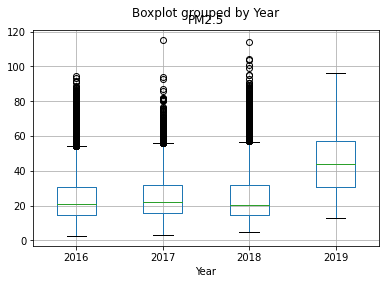

In [11]:
df.boxplot(column='PM2.5', by = 'Year')

# Basic Questions
1. วันที่ ที่มีค่าฝุ่นสูงที่สุด 5 ลำดับแรก


In [12]:
df.nlargest(5,'PM2.5')

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2017-03-03 09:00:00,2017,3,3,2,115.4,1,0,2017-03-03 09:00:00
2018-02-08 10:00:00,2018,2,8,3,114.3,1,0,2018-02-08 10:00:00
2018-02-14 08:00:00,2018,2,14,1,104.1,1,0,2018-02-14 08:00:00
2018-01-22 08:00:00,2018,1,22,1,103.4,0,0,2018-01-22 08:00:00
2018-01-22 09:00:00,2018,1,22,2,100.8,0,0,2018-01-22 09:00:00


2. วันที่ ที่มีค่าฝุ่นต่ำสุด 5 ลำดับแรก

In [13]:
df.nsmallest(5,'PM2.5')

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-09-02 22:00:00,2016,9,2,15,2.5,1,0,2016-09-02 22:00:00
2016-09-02 23:00:00,2016,9,2,16,2.9,1,0,2016-09-02 23:00:00
2016-09-02 20:00:00,2016,9,2,13,3.0,1,0,2016-09-02 20:00:00
2016-09-02 19:00:00,2016,9,2,12,3.2,1,0,2016-09-02 19:00:00
2017-05-25 08:00:00,2017,5,25,1,3.3,1,0,2017-05-25 08:00:00


In [14]:
df['Year'].value_counts()

2018    8122
2017    7890
2016    6905
2019     632
Name: Year, dtype: int64


3. แสดงผลกราฟค่าฝุ่น PM2.5 รายวัน

(23549, 8)

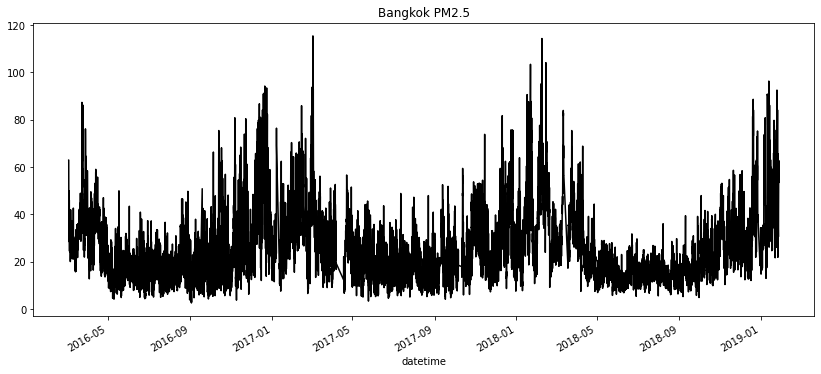

In [15]:
df['PM2.5'].plot(figsize=(14,6), title='Bangkok PM2.5', color = 'black')
df.shape

**สร้างชุดข้อมูลใหม่จากชุดข้อมูลเดิม แบ่งข้อมูลเป็นรายปี โดยการใช้ pivot table**

In [16]:
df.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,8,62.9,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,9,62.9,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,10,55.5,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,11,55.5,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,12,47.9,1,0,2016-03-03 19:00:00


In [17]:
pv = pd.pivot_table(df, index = df.index.day,columns = df.index.year, values = 'PM2.5', aggfunc ='mean')
pv.head(10)

datetime,2016,2017,2018,2019
datetime,,,,
1,18.505641,26.574182,22.428364,22.916667
2,18.789268,26.347143,24.536101,24.095833
3,20.913725,25.697143,26.749650,27.583333
4,23.859686,25.898208,27.293286,29.434783
5,24.202232,24.606182,26.495374,35.179167
6,23.269231,26.461071,26.246263,60.719048
7,23.716667,24.223171,25.580576,57.812500
8,21.068936,25.223267,25.084191,31.547826
9,22.379204,23.306047,24.622308,26.941667


##Challenge Question:##
หากต้องการทราบว่าในแต่ละปี มีวันใดบ้างที่มีค่า PM2.5 ที่เริ่มเป็นอันตรายต่อสุขภาพ (PM2.5 > 50)

Hint: การใช้เงื่อนไขในการเลือกข้อมูล DataFrame จะมีการใช้งานบ่อยๆ ควรศึกษาให้เข้าใจ

In [64]:
pmdf = df.drop(columns=['Year','Month','Day','Hour']).iloc[:,:1]
pmdf.loc[pmdf['PM2.5']>50.0]

,PM2.5
datetime,
2016-03-03 15:00:00,62.9
2016-03-03 16:00:00,62.9
2016-03-03 17:00:00,55.5
2016-03-03 18:00:00,55.5
2016-03-23 04:00:00,54.2
...,...
2019-01-28 05:00:00,62.7
2019-01-28 06:00:00,62.4
2019-01-28 07:00:00,58.1
